# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Variable Descriptions

1. **Entry ID**: A unique identifier for each record in the dataset.
   - Type: Quantitative

2. **Name**: The name of the athlete.
   - Type: Categorical

3. **Gender**: The gender of the athlete (Male or Female).
   - Type: Categorical

4. **Age**: The age of the athlete at the time of the competition.
   - Type: Quantitative

5. **Team**: The country or team the athlete represents.
   - Type: Categorical

6. **NOC**: The National Olympic Committee code representing the country.
   - Type: Categorical

7. **Year**: The year the Olympic Games took place.
   - Type: Quantitative

8. **Season**: The season in which the Olympic Games took place (Summer).
   - Type: Categorical

9. **City**: The city where the Olympic Games were held.
   - Type: Categorical

10. **Sport**: The sport in which the athlete competed.
    - Type: Categorical

11. **Event**: The specific event within the sport that the athlete competed in.
    - Type: Categorical

12. **Medal**: The type of medal the athlete won (Gold, Silver, or Bronze).
    - Type: Categorical


In [2]:
df = pd.read_csv('DATA/filtered_athlete_games.csv')

## OVERVIEW

In [3]:
print(df.shape)
df.head()

(36537, 12)


,Entry ID,Name,Gender,Age,Team,NOC,Year,Season,City,Sport,Event,Medal
0,3,Edgar Lindenau Aabye,Male,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,37,Arvo Ossian Aaltonen,Male,30.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,38,Arvo Ossian Aaltonen,Male,30.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,41,Paavo Johannes Aaltonen,Male,28.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
4,42,Paavo Johannes Aaltonen,Male,28.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


In [4]:
df_info = df.info()
missing_values = df.isnull().sum()

df_info , missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36537 entries, 0 to 36536
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Entry ID  36537 non-null  int64  
 1   Name      36537 non-null  object 
 2   Gender    36537 non-null  object 
 3   Age       35816 non-null  float64
 4   Team      36537 non-null  object 
 5   NOC       36537 non-null  object 
 6   Year      36537 non-null  int64  
 7   Season    36537 non-null  object 
 8   City      36537 non-null  object 
 9   Sport     36537 non-null  object 
 10  Event     36537 non-null  object 
 11  Medal     36537 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.3+ MB


(None,
 Entry ID      0
 Name          0
 Gender        0
 Age         721
 Team          0
 NOC           0
 Year          0
 Season        0
 City          0
 Sport         0
 Event         0
 Medal         0
 dtype: int64)

In [5]:
null_age_rows = df[df['Age'].isnull()]
null_age_rows['Year'].unique()

array([1906, 1920, 1956, 1964, 1900, 1924, 1904, 1908, 1896, 1928, 1932,
       1948, 1960, 1912, 1972, 1936, 1968, 1984, 1952])

In [6]:
df_cleaned = df.dropna()
df_cleaned_missing_values = df_cleaned.isnull().sum()
df_cleaned_missing_values

Entry ID    0
Name        0
Gender      0
Age         0
Team        0
NOC         0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

First, we provide an overview of the data. We only have null values in the Age variable, and as we observe that these correspond to participations in very old Olympic Games, we proceed to remove them from our data.


In [7]:
df_cleaned['Age'] = df_cleaned['Age'].astype(int)
df_cleaned_info =df_cleaned.info()

df_cleaned_info

<class 'pandas.core.frame.DataFrame'>
Index: 35816 entries, 0 to 36536
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Entry ID  35816 non-null  int64 
 1   Name      35816 non-null  object
 2   Gender    35816 non-null  object
 3   Age       35816 non-null  int64 
 4   Team      35816 non-null  object
 5   NOC       35816 non-null  object
 6   Year      35816 non-null  int64 
 7   Season    35816 non-null  object
 8   City      35816 non-null  object
 9   Sport     35816 non-null  object
 10  Event     35816 non-null  object
 11  Medal     35816 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.6+ MB


C:\Users\Pacotm\AppData\Local\Temp\ipykernel_21768\560557579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = df_cleaned['Age'].astype(int)


We convert the Age variable to int.


In [8]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


outliers_entry_id = detect_outliers(df, 'Entry ID')
outliers_age = detect_outliers(df, 'Age')
outliers_year = detect_outliers(df, 'Year')

# Mostrar los resultados
print("Outliers in 'Entry ID':")
print(outliers_entry_id)

Outliers in 'Entry ID':
Empty DataFrame
Columns: [Entry ID, Name, Gender, Age, Team, NOC, Year, Season, City, Sport, Event, Medal]
Index: []


In [9]:
print("\nOutliers in 'Year':")
print(outliers_year)


Outliers in 'Year':
Empty DataFrame
Columns: [Entry ID, Name, Gender, Age, Team, NOC, Year, Season, City, Sport, Event, Medal]
Index: []


In [10]:
print("\nOutliers in 'Age':")
print(outliers_age)


Outliers in 'Age':
       Entry ID                                    Name  Gender   Age  \
162        1755         Nils August Domingo Adlercreutz    Male  45.0   
197        2062                        Henrik Agersborg    Male  47.0   
228        2429                       Christian Ahlmann    Male  41.0   
333        3223  Nasser Salih Nasser Abdullah Al-Attiya    Male  41.0   
335        3304                       Fehaid Al-Deehani    Male  45.0   
...         ...                                     ...     ...   ...   
36366     14189                             WARD McLain    Male  45.0   
36374     14219                        WATHELET Gregory    Male  40.0   
36389     14293                           WERTH Isabell  Female  52.0   
36390     14294                           WERTH Isabell  Female  52.0   
36510     14987                           ZHANG Dechang    Male  42.0   

                Team  NOC  Year  Season            City          Sport  \
162           Sweden  SWE  19

In [11]:
df_cleaned['Age'].describe()

count    35816.000000
mean        25.984057
std          6.030839
min         10.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         73.000000
Name: Age, dtype: float64

In [12]:
df_cleaned['Age'].value_counts()

Age
23    3079
24    3008
22    2871
25    2855
26    2659
      ... 
71       2
11       1
73       1
10       1
65       1
Name: count, Length: 62, dtype: int64

In [13]:
import pandas as pd

under_16_count = df_cleaned[df_cleaned['Age'] < 13].shape[0]
over_65_count = df_cleaned[df_cleaned['Age'] > 70].shape[0]

print(f"Number of participants under 16 years old: {under_16_count}")
print(f"Number of participants over 65 years old: {over_65_count}")


Number of participants under 16 years old: 9
Number of participants over 65 years old: 5


In [14]:
df_cleaned = df_cleaned[(df_cleaned['Age'] >= 13) & (df_cleaned['Age'] <= 70)]

We verified that there are no outlier values for the numeric variables Year and Entry ID. However, for the variable Age, there are some outlier values. We decided to only remove the values for participants younger than 13 years old and older than 70 years old.


## GENDER

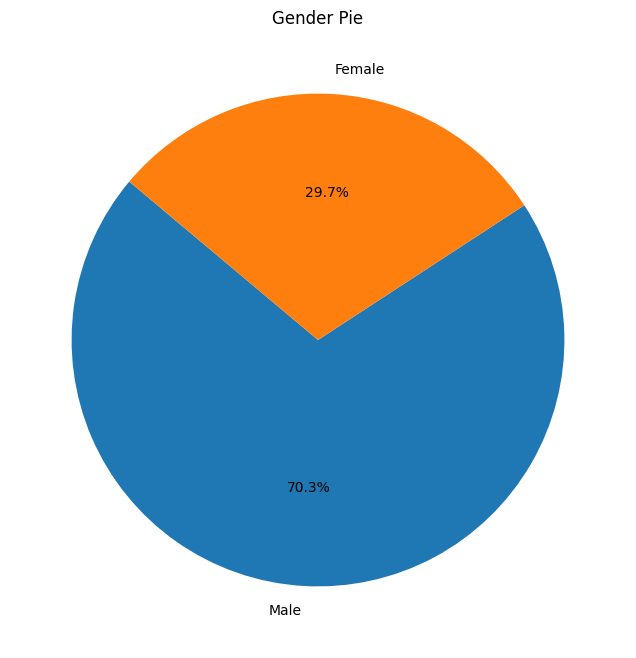

In [15]:
gender_value_counts = df_cleaned['Gender'].value_counts()

plt.figure(figsize=(8, 8))
gender_value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=gender_value_counts.index)
plt.title('Gender Pie')
plt.ylabel('')  
plt.show()

In [17]:
gender_value_counts

Gender
Male      25175
Female    10627
Name: count, dtype: int64

## AGE

In [18]:
df_cleaned['Age'].describe()

count    35802.000000
mean        25.981258
std          6.003361
min         13.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         69.000000
Name: Age, dtype: float64

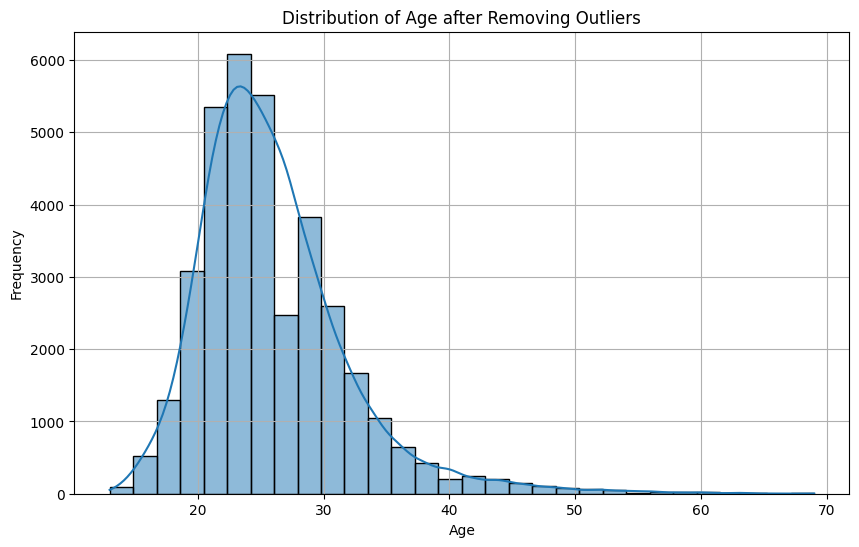

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], kde=True, bins=30)
plt.title('Distribution of Age after Removing Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## TEAM

In [27]:
team_description = df_cleaned['Team'].describe()
team_description

count             35802
unique              471
top       United States
freq               4969
Name: Team, dtype: object

In [28]:
teams_unique = df_cleaned['Team'].unique()

teams_unique

array(['Denmark/Sweden', 'Finland', 'Norway', 'Netherlands', 'Taifun',
       'France', 'Italy', 'Spain', 'Azerbaijan', 'Russia', 'Belarus',
       'Cameroon', 'United States', 'Hungary', 'Australia', 'Iran',
       'Canada', 'Pakistan', 'Soviet Union', 'Uzbekistan', 'Tajikistan',
       'Unified Team', 'Ethiopia', 'Switzerland', 'East Germany',
       'Fornebo', 'Vesper Boat Club', 'Sweden', 'South Africa', 'Turkey',
       'Bulgaria', 'Egypt', 'Great Britain', 'Jordan', 'Japan', 'Romania',
       'Puerto Rico', 'Mexico', 'Ghana', 'Morocco', 'New Zealand',
       'Argentina', 'Cuba', 'Uruguay', 'Poland', 'Czechoslovakia',
       'Germany', 'Nigeria', 'Brazil', 'France-1', 'Austria', 'Lithuania',
       'Stella-2', 'Indonesia', 'Indonesia-1', 'Germany-1',
       'Lucky Girl-1', 'Mutafo', 'Chile', 'Great Britain-1',
       'Union des Socits Franais de Sports Athletiques', 'Ukraine',
       'Greece', 'Bissbi', 'Uganda', 'Syria', 'Qatar', 'Kuwait',
       'Individual Olympic Athletes', 'S

C:\Users\Pacotm\AppData\Local\Temp\ipykernel_21768\58543521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y = team_df["Team"],x=team_df["count"],palette="mako")


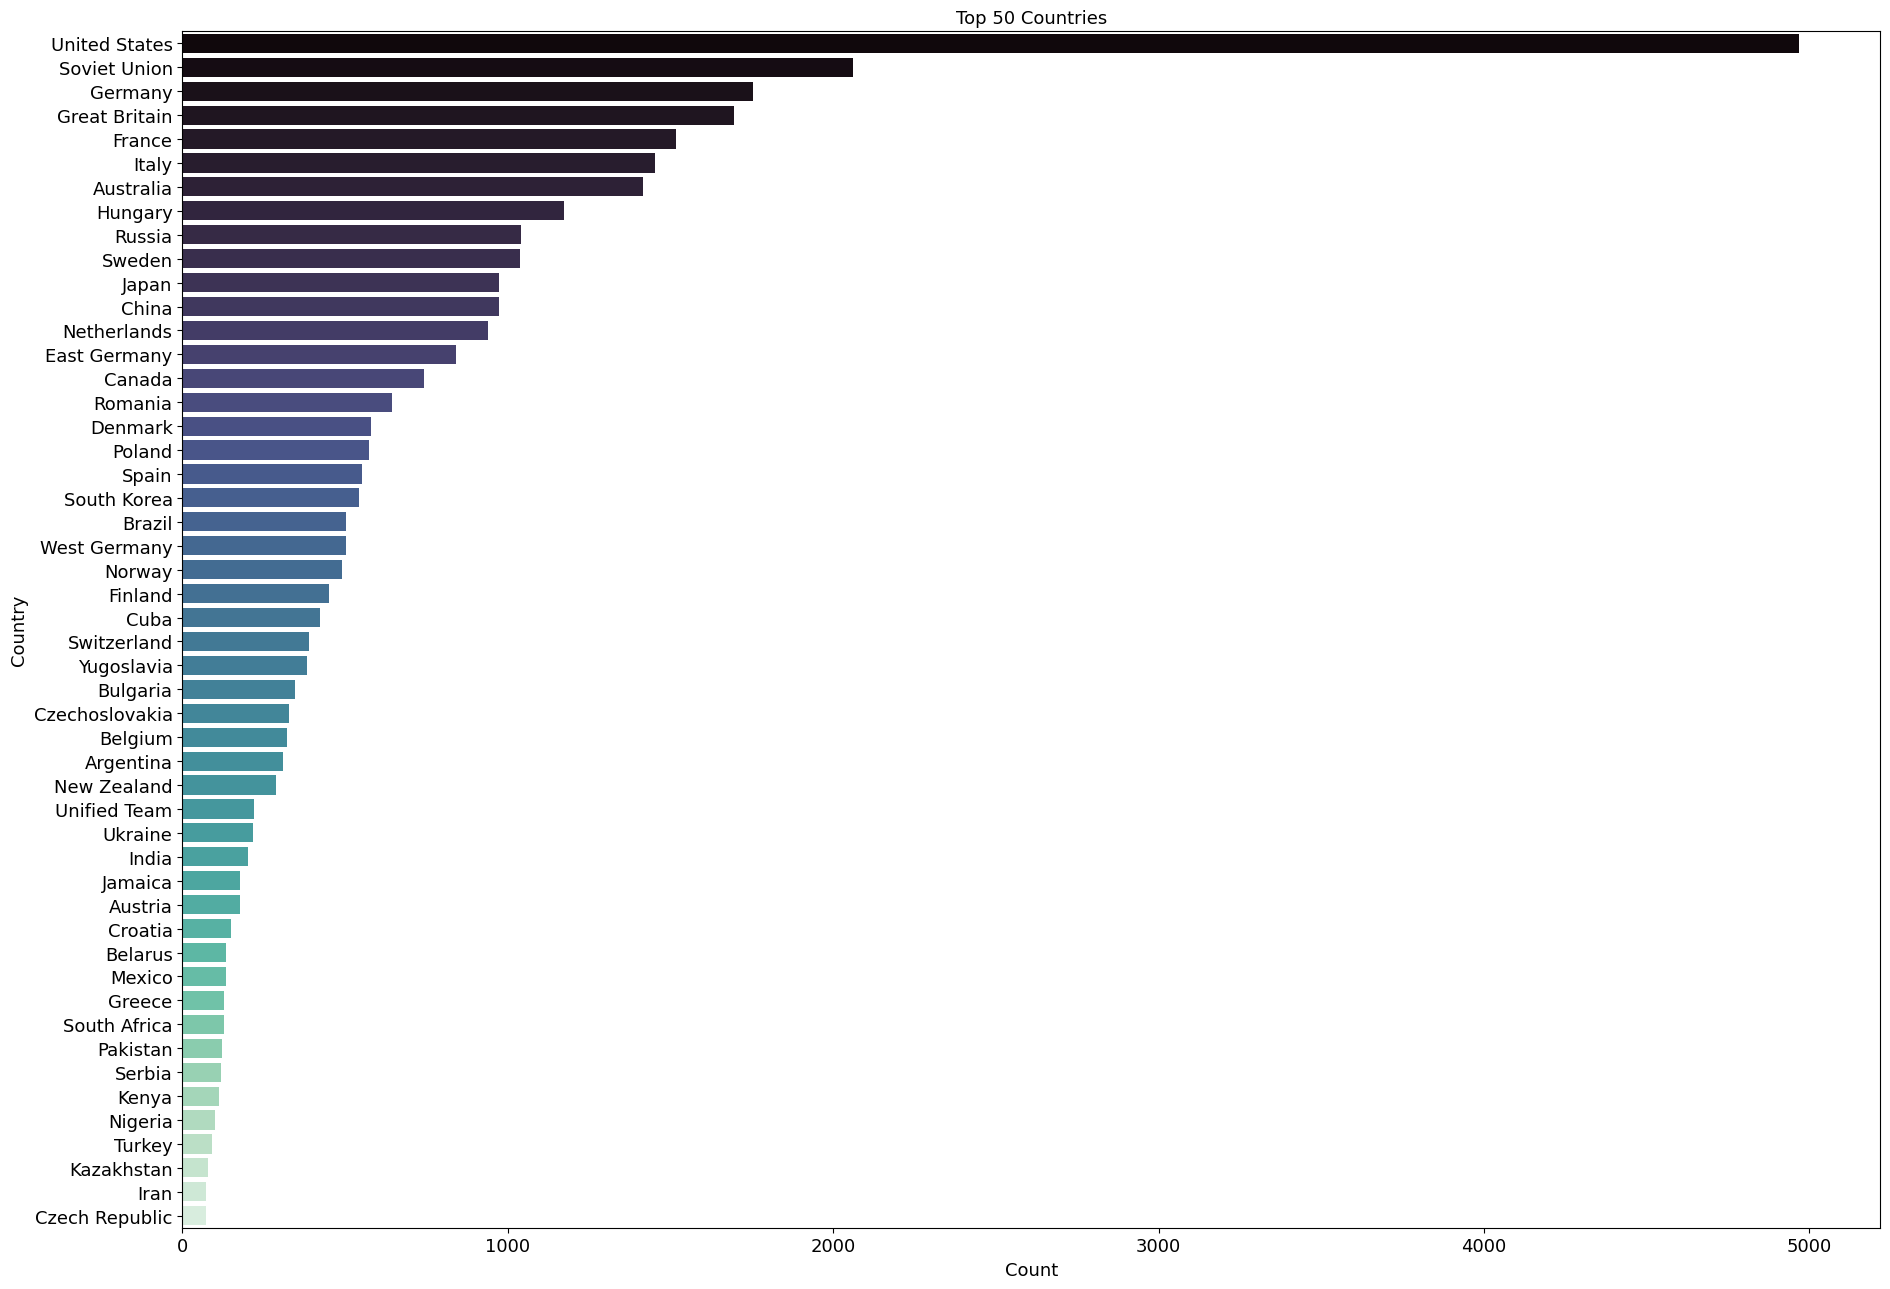

In [29]:
team_df = pd.DataFrame(df_cleaned["Team"].value_counts()[:50]).reset_index()
plt.figure(figsize=(19,13))
ax1 = sns.barplot(y = team_df["Team"],x=team_df["count"],palette="mako")
ax1.tick_params(axis= "x" ,labelsize=13)
ax1.tick_params(axis= "y" ,labelsize=13)
plt.ylabel("Country",fontsize = 13)
plt.xlabel("Count",fontsize = 13)
plt.title("Top 50 Countries",fontsize = 13)
plt.tight_layout()

## NOC

In [30]:
noc_describe = df_cleaned['NOC'].describe()
noc_describe

count     35802
unique      150
top         USA
freq       5254
Name: NOC, dtype: object

In [31]:
noc_unique = df_cleaned['NOC'].unique()
noc_unique

array(['DEN', 'FIN', 'NOR', 'NED', 'FRA', 'ITA', 'ESP', 'AZE', 'RUS',
       'BLR', 'CMR', 'USA', 'HUN', 'AUS', 'IRI', 'CAN', 'PAK', 'URS',
       'UZB', 'TJK', 'EUN', 'ETH', 'SUI', 'GDR', 'SWE', 'RSA', 'TUR',
       'BUL', 'EGY', 'GBR', 'JOR', 'JPN', 'ROU', 'PUR', 'MEX', 'GHA',
       'MAR', 'NZL', 'ARG', 'CUB', 'URU', 'POL', 'TCH', 'GER', 'NGR',
       'BRA', 'AUT', 'LTU', 'INA', 'CHI', 'UKR', 'GRE', 'UGA', 'SYR',
       'QAT', 'KUW', 'IOA', 'KSA', 'UAE', 'CRO', 'FRG', 'ARM', 'SRB',
       'NIG', 'IND', 'BEL', 'ALG', 'JAM', 'TTO', 'COL', 'LUX', 'BOT',
       'TUN', 'KOR', 'PRK', 'CHN', 'YUG', 'GUY', 'ISR', 'KAZ', 'GEO',
       'KEN', 'ISL', 'MAS', 'CZE', 'SVK', 'BAH', 'ANZ', 'PAR', 'MNE',
       'IRL', 'POR', 'GUA', 'SCG', 'TAN', 'LIB', 'KGZ', 'LAT', 'AHO',
       'VEN', 'THA', 'TOG', 'PER', 'EST', 'SLO', 'HAI', 'TPE', 'ZIM',
       'MGL', 'MDA', 'CIV', 'FIJ', 'SEN', 'DOM', 'PHI', 'UAR', 'SGP',
       'NAM', 'WIF', 'BOH', 'BER', 'VIE', 'ISV', 'MKD', 'SUD', 'BRN',
       'GRN', 'SRI',

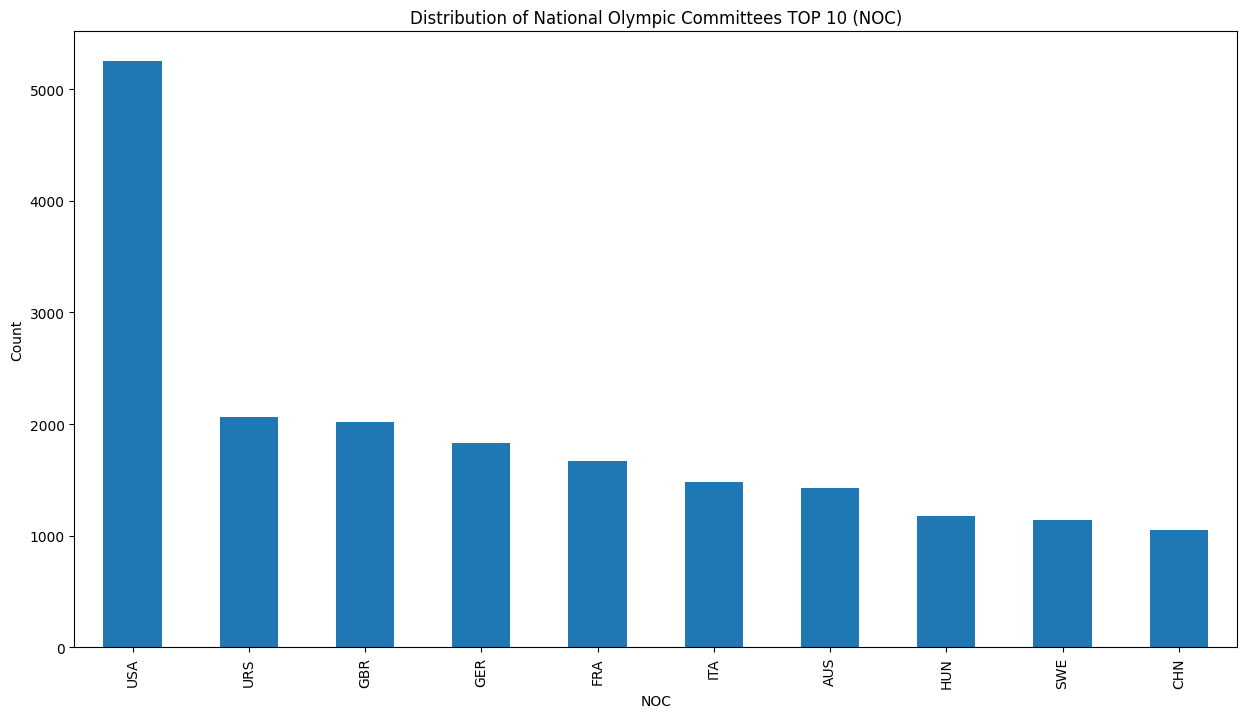

In [35]:
noc_counts = df_cleaned['NOC'].value_counts().head(10)

plt.figure(figsize=(15, 8))
noc_counts.plot(kind='bar')
plt.title('Distribution of National Olympic Committees TOP 10 (NOC)')
plt.xlabel('NOC')
plt.ylabel('Count')
plt.show()

## SEASON

In [24]:
df_cleaned['Season'].value_counts()

Season
Summer    35802
Name: count, dtype: int64

We verified that in the Season column, we only have the Summer Olympic Games.


## CITY


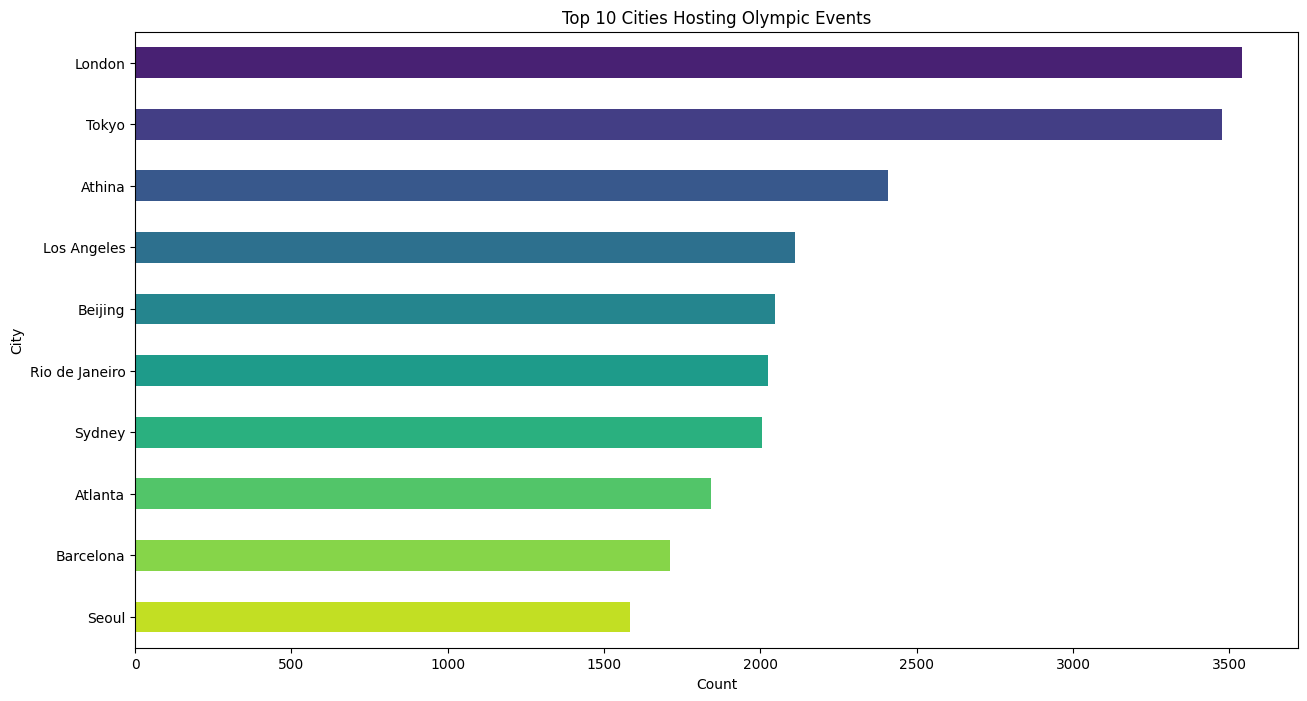

In [38]:
city_counts = df_cleaned['City'].value_counts().head(10)
sns.set_palette("viridis")

plt.figure(figsize=(15, 8))
city_counts.plot(kind='barh', color=sns.color_palette("viridis", len(city_counts)))
plt.title('Top 10 Cities Hosting Olympic Events')
plt.xlabel('Count')
plt.ylabel('City')
plt.gca().invert_yaxis()  
plt.show()


## SPORT

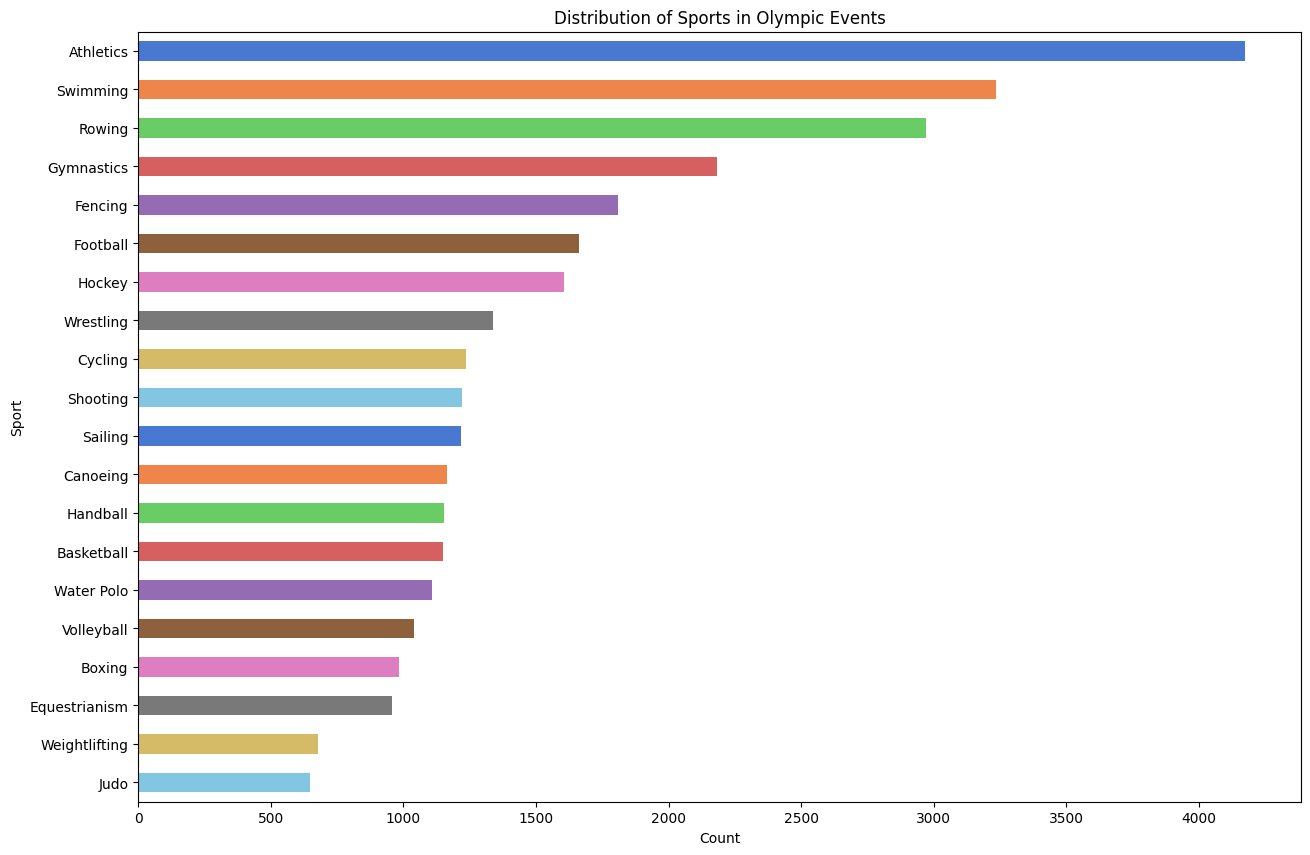

In [40]:
sport_counts = df_cleaned['Sport'].value_counts().head(20)

sns.set_palette("muted")
plt.figure(figsize=(15, 10))
sport_counts.plot(kind='barh', color=sns.color_palette("muted", len(sport_counts)))
plt.title('Distribution of Sports in Olympic Events')
plt.xlabel('Count')
plt.ylabel('Sport')
plt.gca().invert_yaxis() 
plt.show()


## MEDAL

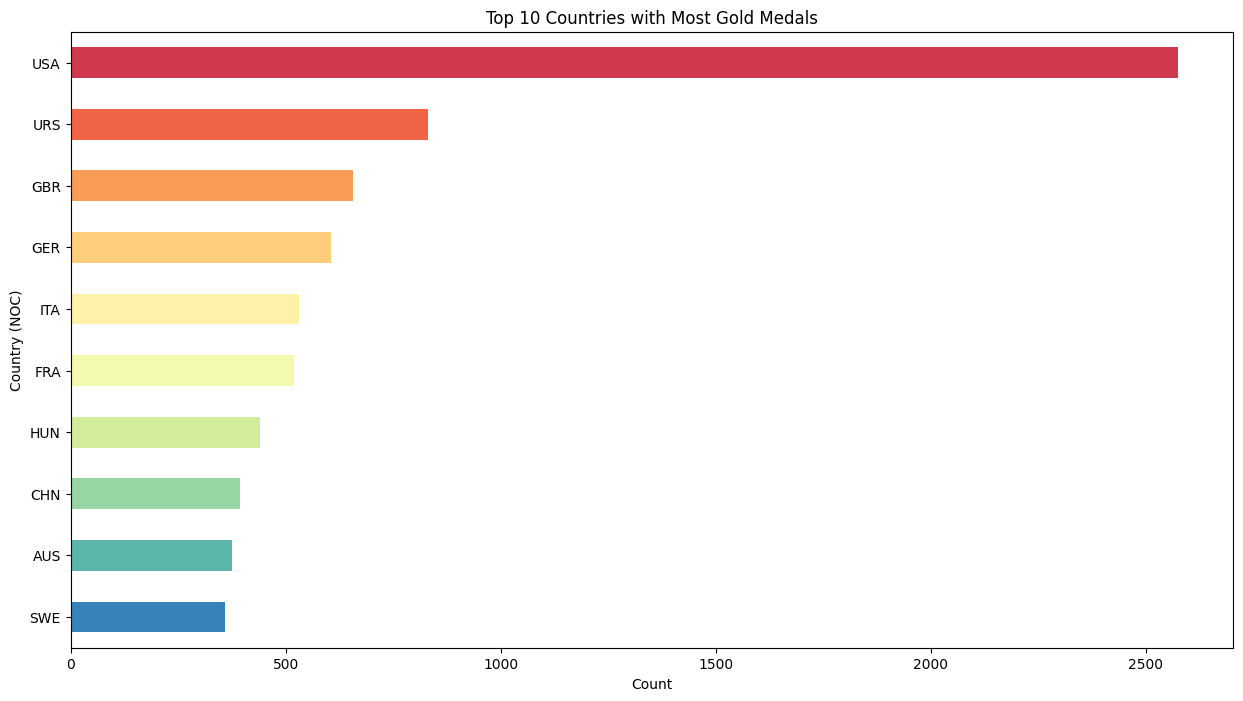

In [49]:
gold_medals = df_cleaned[df_cleaned['Medal'] == 'Gold']


gold_medal_counts = gold_medals['NOC'].value_counts().head(10)

sns.set_palette("Spectral")

plt.figure(figsize=(15, 8))
gold_medal_counts.plot(kind='barh', color=sns.color_palette("Spectral", len(gold_medal_counts)))
plt.title('Top 10 Countries with Most Gold Medals')
plt.xlabel('Count')
plt.ylabel('Country (NOC)')
plt.gca().invert_yaxis()  
plt.show()


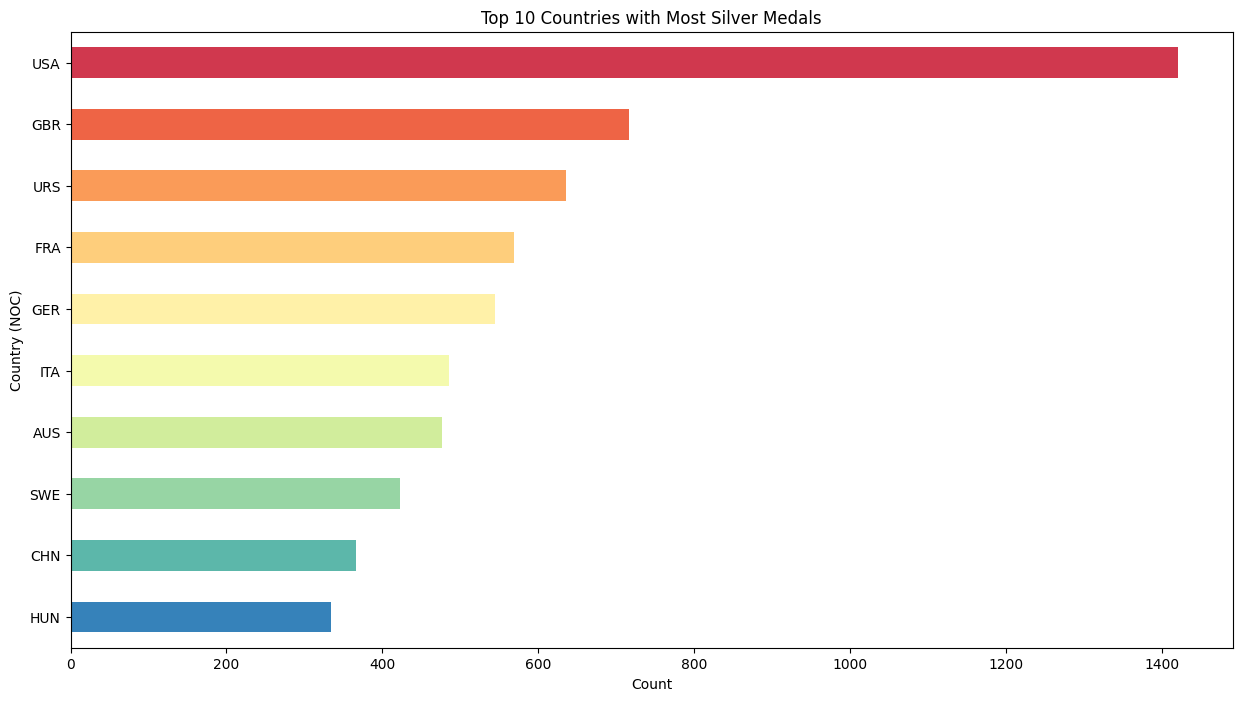

In [50]:
silver_medals = df_cleaned[df_cleaned['Medal'] == 'Silver']

silver_medal_counts = silver_medals['NOC'].value_counts().head(10)

sns.set_palette("Spectral")

plt.figure(figsize=(15, 8))
silver_medal_counts.plot(kind='barh', color=sns.color_palette("Spectral", len(silver_medal_counts)))
plt.title('Top 10 Countries with Most Silver Medals')
plt.xlabel('Count')
plt.ylabel('Country (NOC)')
plt.gca().invert_yaxis()  
plt.show()


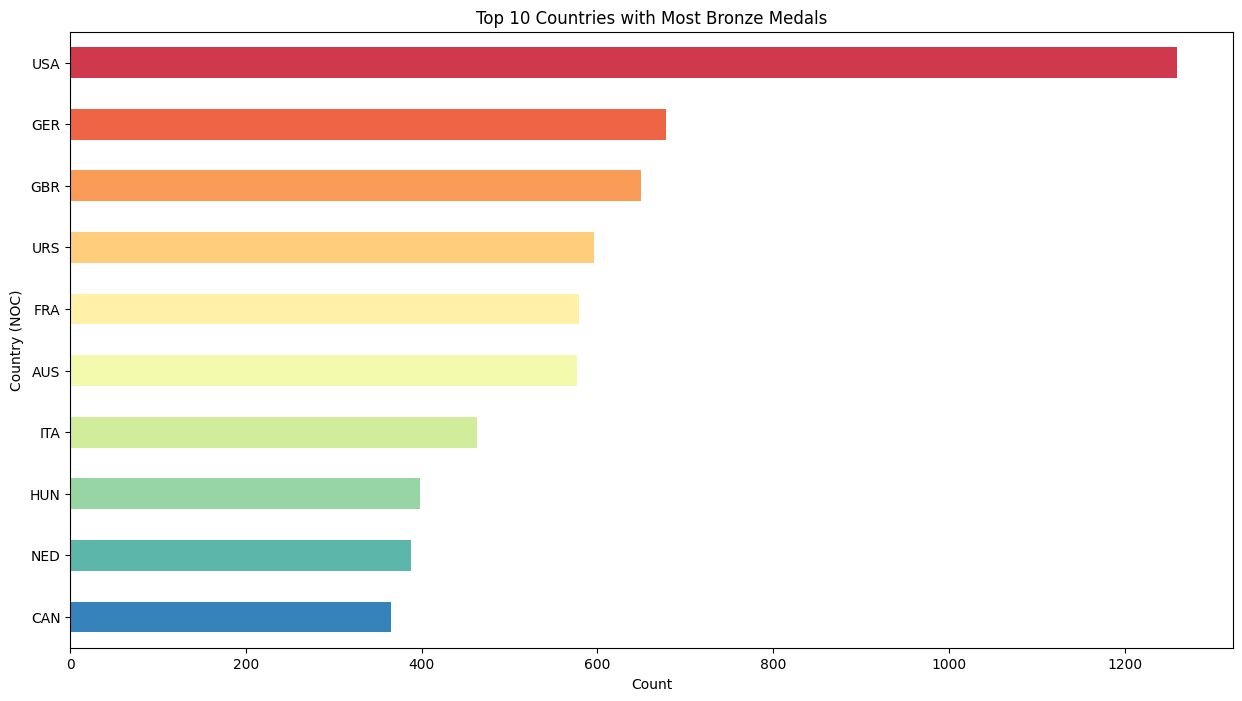

In [51]:
bronze_medals = df_cleaned[df_cleaned['Medal'] == 'Bronze']
bronze_medal_counts = bronze_medals['NOC'].value_counts().head(10)


sns.set_palette("Spectral")


plt.figure(figsize=(15, 8))
bronze_medal_counts.plot(kind='barh', color=sns.color_palette("Spectral", len(bronze_medal_counts)))
plt.title('Top 10 Countries with Most Bronze Medals')
plt.xlabel('Count')
plt.ylabel('Country (NOC)')
plt.gca().invert_yaxis()  
plt.show()


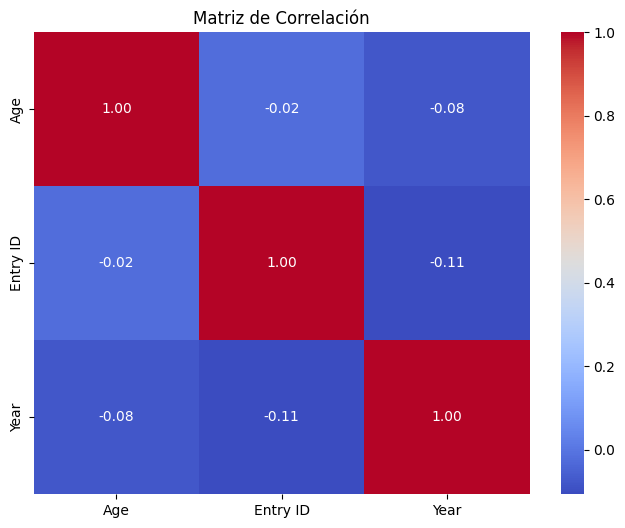

In [54]:
correlation_matrix = df_cleaned[["Age", "Entry ID", "Year"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corelatrion')
plt.show()

## SAVE FINAL DATA

In [52]:
df_cleaned.to_csv('final_filtered_athlete_games.csv', index=False)